<a href="https://colab.research.google.com/github/SonicX-svg/ML_works/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0_%D1%81%D0%B8%D0%BD%D1%82%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Импорт


In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
from matplotlib.colors import ListedColormap # функция библиотеки Matplotlib, которая генерирует цветовую карту

import seaborn as sns# библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import make_moons, make_circles, make_classification # генерируемые наборы данных


# Данные

Наши старые друзья / знакомые


In [ ]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    """Визуализация двумерных  данных для классификации
    Входные переменные:
    ===========
    ax: отдельная ячейка объекта figure
    ds: набор данных, содержащий признаки X и целевые метки y
    name: название графика
    marker: тип маркера - по умолчанию просто круги
    colors: цвета, которые будут использоваться для раскраски разных классов - по умолчанию Красный и Синий
    alpha: прозрачность маркеров
    s: размер маркера (~ квадрат радиуса)
    facecolor:
    """

    X, y = ds # распаковываем признаки и целевые метки в отдельные переменные

    cm_bright = ListedColormap(colors) # формируем цветовую карту из наших цветов
    ax.set_title(name, fontsize = 30) # прописываем название графика
    if facecolor: # если переменная задана, то просто рисуем скатерограмму по признакам с использованием параметров маркеров
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else: # иначе так же рисуем скатерограмму, но без
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)
    # немного красоты и аккуратности
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # фиксируем минимальные и максимальные значения по горизонтали
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # фиксируем минимальные и максимальные значения по вертикали
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [ ]:
def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42,):
    """Создание синтетического набора данных
    для бинарной классификации
    Входные переменные:
    ===========
    N: количество точек
    method: тип набора данных
    noises: коэффициент ~ сила шума
    random_state: фиксированный сид случайных чисел (для повторяемости)
    """
    # фиксируем случайный seed
    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        # если выбран метод line (или никакой не задан)
        # то мы создаем набор данных с использованием функции make_classification
        # это будут линейно-разделимые данные
        X, y = make_classification(n_samples=N, # количество точек
                                   n_features=2, # количество признаков
                                   n_redundant=0, # количество бесполезных признаков
                                   n_informative=2,# количество информативных признаков
                                   n_clusters_per_class=1, # количество групп точек на класс
                                   class_sep=2, # количество классов
                                   random_state=random_state # фиксированный сид случайных чисел
                                   )
        X += np.random.randn(*X.shape) *noises # добавляем к признакам случайный шум

    elif method == 'moons':
        # если выбран метод moons
        # то мы создаем набор данных с использованием функции make_moons
        # это будут данные похожие на Инь-Ян
        X, y = make_moons(n_samples=N, # количество точек
                          noise=noises, # уровень шума
                          random_state=random_state # фиксированный сид случайных чисел
                          )

    elif method == 'circles':
        # если выбран метод circles
        # то мы создаем набор данных с использованием функции make_circles
        # это будут данные в виде концентрических окружностей
        X, y = make_circles(n_samples=N, # количество точек
                            noise=noises, # уровень шума
                            factor=0.5, # соотношение радиусов внуренней и внешней окружности
                            random_state=random_state # фиксированный сид случайных чисел
                            )


    return X,y

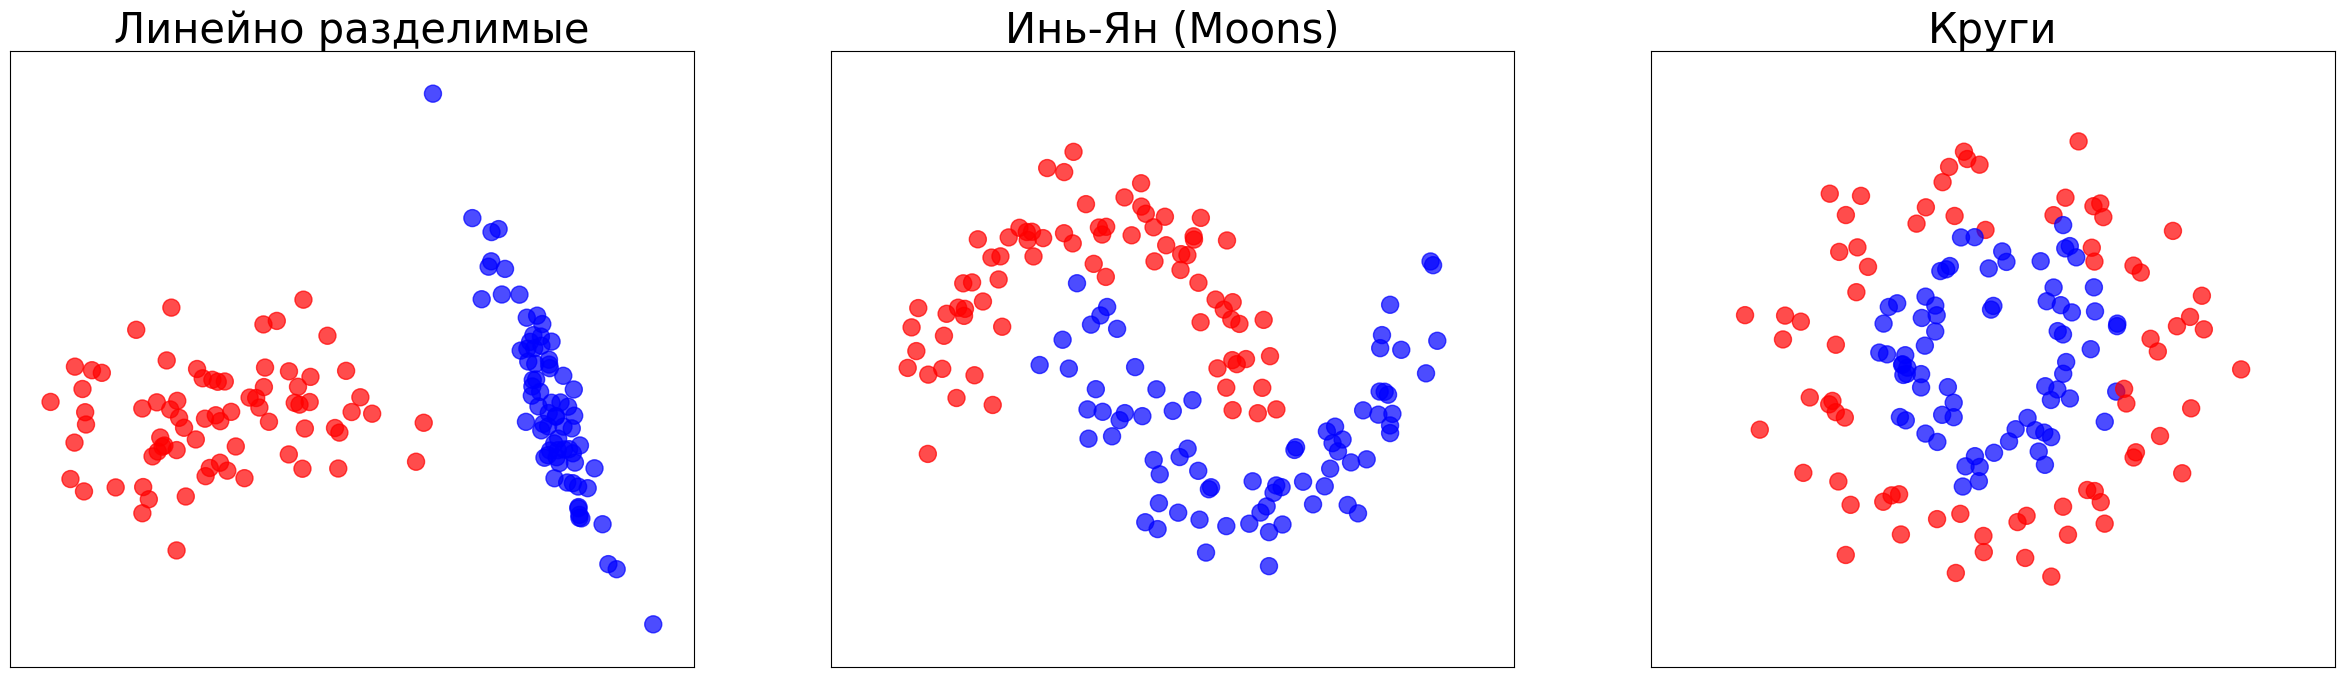

In [ ]:
#@title визуализация данных { run: "auto" }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}

fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line',
                             noises = noises),
          'Линейно разделимые')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons',
                             noises = noises),
          'Инь-Ян (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles',
                              noises = noises),
          'Круги')




За неимением лучшего аналога тестировать алгоритмы кластеризации будем на тех же наборах, что и классификацию

# Спектральная кластеризация

Начнем по традиции с простых данных - линейно разделимых

тут мы сгенерировали меньше точек чтобы проще работать с матрицей смежности

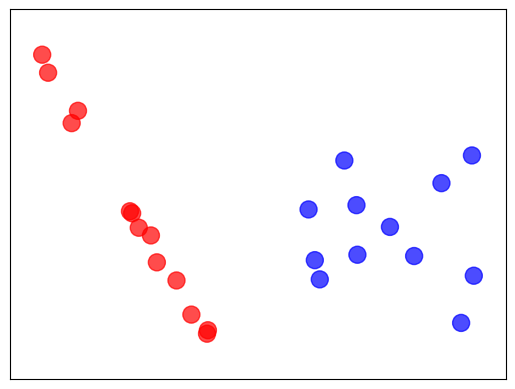

In [ ]:
N = 25
X,y = make_binary_clf(N,method = 'line', noises=0.05, )
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X,y))

In [ ]:
from sklearn.cluster import SpectralClustering # Спектральная Кластеризация от Scikit-learn

По традиции мы сначала создаем объект нужного нам класса, в котором мы можем изменять гиперпараметры

В случае Спектральной рекомендуется варьировать

*   количество кластеров `n_clusters`
*   подход к вычислению матрицы смежности `affinity`
 * `'nearest_neighbors'`: Граф К Ближайших Соседей
        * `'n_neighbors'`: количество К соседей

 * `'rbf'`: Радиальная базисная функция
     * `'gamma'`: параметр радиальной функции



In [ ]:
# Создаем Класс Спектральной Кластеризации
sc = SpectralClustering(n_clusters=2,
                     affinity = 'rbf',
                     gamma = 1
                     )

sc

SpectralClustering(gamma=1, n_clusters=2)


Традиционно обучаем методом `.fit()`

In [ ]:
sc.fit(X);

**Важно**

Предсказание меток кластеров - с помощью метода `.fit_predict()`

Т.е. нельзя предсказывать на новых данных

In [ ]:
labels = sc.fit_predict(X)

Запишем функцию для визуализации результатов кластеризации

In [ ]:
def plot_clustering(X, sc):
    """Результатов кластеризации
    Входные переменные:
    ===========
    X: данные на которых мы хотим построить визуализацию
    sc: обученный класс Спектральной кластеризации
    """
    labels = sc.fit_predict(X) # предсказываем метки кластеров
    ax = plt.subplot(1, 1, 1) # создаем полотно
    # отрисовываем скатерограмму
    ax.scatter(X[:, 0], X[:, 1], # данные
                    c=labels,  # подкрашиваем по предсказанным меткам
                    alpha = 0.75, # прозрачность
                    cmap = 'bwr', # тип цветовой карты
                    edgecolor = 'k', # цвет края - черный
                    s = 100  # размер
               )
    plt.xticks([],[])
    plt.yticks([],[])

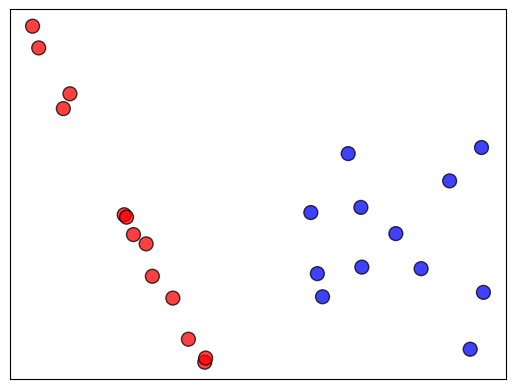

In [ ]:
plot_clustering(X, sc)

## Анализ матрицы смежности

В аттрибуте `.affinity_matrix_` хранится матрица смежности

In [ ]:
sc.affinity_matrix_

array([[1.00000000e+00, 1.59973725e-03, 1.61141744e-02, 1.09232586e-01,
        8.14139199e-04, 1.80360832e-11, 2.18052282e-01, 9.54120325e-05,
        1.20175599e-04, 1.01675049e-10, 2.35133154e-08, 9.50384554e-01,
        9.09838881e-03, 6.60061809e-01, 6.40050508e-03, 3.26079763e-03,
        1.81561343e-08, 5.77165994e-04, 3.24974441e-02, 3.69351511e-01,
        2.66974015e-04, 7.06084931e-03, 1.54524824e-01, 5.34624588e-01,
        3.56226163e-02],
       [1.59973725e-03, 1.00000000e+00, 5.37836414e-01, 1.15726545e-07,
        9.07842502e-01, 2.19353586e-04, 1.74491076e-06, 6.11154293e-01,
        6.43460992e-01, 7.21464738e-04, 1.35918935e-02, 2.43007128e-03,
        1.52343593e-09, 6.07688795e-05, 1.27760264e-10, 2.92168776e-11,
        1.63762035e-02, 9.86558433e-12, 2.93089939e-01, 4.49247728e-05,
        7.98640083e-01, 8.75555435e-01, 5.86441622e-05, 2.75910122e-03,
        3.04196465e-01],
       [1.61141744e-02, 5.37836414e-01, 1.00000000e+00, 4.16832729e-06,
        3.1397

In [ ]:
def viz_df(data, vmin = 0, vmax = 1):
    """Визуализация данных в виде подкрашиваемой таблички
    Входные переменные:
    ===========
    data: данные
    vmin: указываем нижний диапазон
    vmax: указываем верхний  диапазон
    """
    cm = sns.color_palette("vlag", as_cmap=True)    # создадим цветовой стиль, чтобы раскрасить табличку

    DF = pd.DataFrame(data).style.background_gradient(cmap=cm,    # наш цветовой стиль
                                        vmin = vmin,  # указываем нижний диапазон
                                        vmax = vmax # указываем верхний  диапазон
                                        ).format(precision=3) # округление чисел

    display(DF)

Для удобвства воспользуемся функцией

In [ ]:
viz_df(sc.affinity_matrix_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.000,0.002,0.016,0.109,0.001,0.000,0.218,0.000,0.000,0.000,0.000,0.950,0.009,0.660,0.006,0.003,0.000,0.001,0.032,0.369,0.000,0.007,0.155,0.535,0.036
1,0.002,1.000,0.538,0.000,0.908,0.000,0.000,0.611,0.643,0.001,0.014,0.002,0.000,0.000,0.000,0.000,0.016,0.000,0.293,0.000,0.799,0.876,0.000,0.003,0.304
2,0.016,0.538,1.000,0.000,0.314,0.000,0.000,0.110,0.123,0.000,0.000,0.018,0.000,0.001,0.000,0.000,0.000,0.000,0.902,0.000,0.205,0.822,0.000,0.009,0.909
3,0.109,0.000,0.000,1.000,0.000,0.000,0.783,0.000,0.000,0.000,0.000,0.092,0.437,0.460,0.340,0.404,0.000,0.130,0.000,0.327,0.000,0.000,0.102,0.052,0.000
4,0.001,0.908,0.314,0.000,1.000,0.001,0.000,0.838,0.865,0.003,0.042,0.001,0.000,0.000,0.000,0.000,0.047,0.000,0.144,0.000,0.958,0.667,0.000,0.002,0.153
5,0.000,0.000,0.000,0.000,0.001,1.000,0.000,0.008,0.007,0.953,0.500,0.000,0.000,0.000,0.000,0.000,0.458,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000
6,0.218,0.000,0.000,0.783,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.224,0.418,0.705,0.096,0.137,0.000,0.106,0.000,0.720,0.000,0.000,0.354,0.195,0.000
7,0.000,0.611,0.110,0.000,0.838,0.008,0.000,1.000,0.998,0.019,0.152,0.000,0.000,0.000,0.000,0.000,0.171,0.000,0.038,0.000,0.950,0.331,0.000,0.000,0.041
8,0.000,0.643,0.123,0.000,0.865,0.007,0.000,0.998,1.000,0.016,0.137,0.000,0.000,0.000,0.000,0.000,0.154,0.000,0.044,0.000,0.965,0.359,0.000,0.001,0.047
9,0.000,0.001,0.000,0.000,0.003,0.953,0.000,0.019,0.016,1.000,0.676,0.000,0.000,0.000,0.000,0.000,0.642,0.000,0.000,0.000,0.007,0.000,0.000,0.000,0.000


In [ ]:
from scipy.sparse import csgraph # Модуль для быстрой обработки графов, основанные на представлении разреженных матриц
from numpy import linalg as LA #Модуль Линейной алгебры

def get_eigen_am(sc):
    """Оценка собственных значений и собственных векторов для матрицы смежности
    Входные переменные:
    ===========
    sc: обученный класс Спектральной кластеризации
    """
    # Построение матрицы Лапласиана
    L = csgraph.laplacian(sc.affinity_matrix_, normed = True)

    # Вычисление собственных значений и векторов
    try:
        eigenvalues, eigenvectors = LA.eigh(L.todense())
    except:
        eigenvalues, eigenvectors = LA.eigh(L)

    # Сортировка по возрастанию собственных значений
    sorted_indexes = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indexes]
    eigenvectors = np.array(eigenvectors[:,sorted_indexes])

    return eigenvalues, eigenvectors

Оценим собственные вектора и собственные значения для лапласиана наших данных

In [ ]:
eigenvalues, eigenvectors = get_eigen_am(sc)

In [ ]:
viz_df(eigenvectors, vmin = -0.7, vmax = 0.7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-0.194,-0.214,0.002,0.270,0.000,-0.105,0.429,-0.251,0.009,0.003,0.054,-0.002,-0.009,0.003,-0.326,0.002,0.007,0.172,0.288,0.603,0.001,0.000,0.004,0.000,0.001
1,-0.247,0.205,-0.178,-0.015,0.102,0.001,-0.010,0.006,0.379,0.354,0.000,0.393,-0.626,-0.173,-0.000,0.015,0.096,-0.005,-0.007,-0.000,0.002,0.002,0.000,0.002,-0.000
2,-0.220,0.171,-0.195,0.007,-0.382,0.007,-0.021,0.005,-0.018,0.020,0.009,0.028,0.025,-0.014,0.048,0.006,-0.853,0.042,0.054,0.003,-0.012,-0.000,0.000,-0.000,-0.000
3,-0.198,-0.241,0.017,-0.232,-0.002,-0.062,-0.280,-0.352,-0.002,-0.003,-0.479,0.005,0.001,-0.001,0.146,-0.001,0.031,0.608,-0.072,-0.019,0.000,0.000,-0.124,-0.000,0.016
4,-0.245,0.207,-0.155,-0.020,0.251,-0.002,0.002,0.001,0.175,0.035,-0.008,-0.866,-0.149,-0.071,0.007,0.015,-0.007,-0.000,-0.001,-0.000,0.002,0.003,-0.000,0.002,0.000
5,-0.153,0.150,0.443,0.008,-0.092,0.001,-0.004,0.003,0.401,-0.373,0.001,0.037,0.035,-0.038,0.000,0.010,-0.004,0.000,0.000,0.000,-0.000,0.007,-0.000,0.667,0.000
6,-0.219,-0.262,0.015,-0.029,0.015,0.108,-0.428,-0.306,-0.005,-0.006,-0.223,-0.000,-0.005,0.002,-0.268,0.002,-0.037,-0.659,0.160,0.032,0.000,0.000,-0.097,-0.000,-0.001
7,-0.228,0.196,-0.093,-0.021,0.342,-0.004,0.013,-0.006,-0.268,-0.241,0.003,0.176,0.149,-0.311,0.002,0.709,-0.014,0.001,0.001,0.000,-0.001,-0.007,-0.000,-0.007,-0.000
8,-0.230,0.198,-0.101,-0.021,0.341,-0.004,0.013,-0.006,-0.230,-0.240,0.003,0.165,0.145,-0.355,-0.007,-0.704,-0.022,0.001,0.001,0.000,-0.001,-0.004,-0.000,-0.006,-0.000
9,-0.168,0.165,0.477,0.009,-0.091,0.001,-0.004,0.002,0.302,-0.263,0.001,0.022,0.021,-0.022,0.000,0.006,-0.002,0.000,0.000,0.000,-0.000,0.036,0.000,-0.739,-0.000


## Пространство собственных векторов

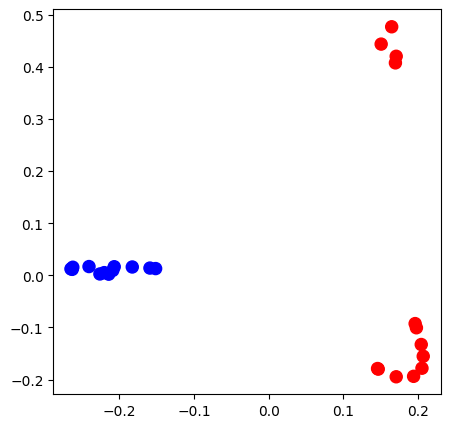

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))

ax.scatter(eigenvectors[:,1],
           eigenvectors[:,2],
           cmap = 'bwr',
           c=labels,
           s = 75);

In [ ]:
eigenvalues

array([1.97313451e-16, 1.16838547e-02, 1.14790827e-01, 3.21322990e-01,
       4.97095123e-01, 6.94450978e-01, 8.69734513e-01, 9.60767046e-01,
       1.04122641e+00, 1.10002627e+00, 1.18029495e+00, 1.19835736e+00,
       1.19937462e+00, 1.21321218e+00, 1.22770140e+00, 1.23164836e+00,
       1.24983772e+00, 1.25634378e+00, 1.25839412e+00, 1.29921926e+00,
       1.31400957e+00, 1.37969254e+00, 1.44388050e+00, 1.45596758e+00,
       1.48096803e+00])

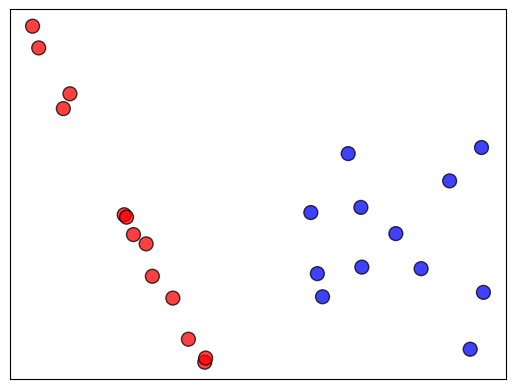

In [ ]:
#@title Применение Спектральной Кластеризации  { run: "auto" }
#@markdown ### потенциальное число кластеров
n_clusters = 2 #@param {type:"slider", min:2, max:10, step:1}
#@markdown ### подход к вычислению матрицы смежности
affinity = 'nearest_neighbors' #@param ["nearest_neighbors", "rbf"]{type:"string"}
#@markdown ### параметр радиальной функции
gamma = 1 #@param {type:"slider", min:-2, max:2, step:0.25}
#@markdown ### количество К соседей
n_neighbors = 13 #@param {type:"slider", min:1, max:25, step:4}

gamma = 10** gamma

# Создаем Класс Спектральной Кластеризации
sc = SpectralClustering(n_clusters=n_clusters,
                        affinity=affinity,
                        gamma= gamma,
                        n_neighbors = n_neighbors)

plot_clustering(X, sc)


Матрица смежности для Графа К Ближайших соседей

чтобы визуализировать применяем метод `.todense()`

In [ ]:
viz_df(sc.affinity_matrix_.todense())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.500,0.500,0.000,0.500,1.000,1.000,0.000,1.000,1.000,1.000,1.000
1,0.000,1.000,1.000,0.000,1.000,0.500,0.000,1.000,1.000,0.500,1.000,0.500,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.500,1.000
2,1.000,1.000,1.000,0.000,1.000,0.500,0.000,1.000,1.000,0.500,0.500,1.000,0.000,0.500,0.000,0.000,0.500,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000
3,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.500
4,0.000,1.000,1.000,0.000,1.000,0.500,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.500,1.000
5,0.000,0.500,0.500,0.000,0.500,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.500,0.000,1.000,0.500,0.000,0.000,0.500
6,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.500
7,0.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000
8,0.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000
9,0.000,0.500,0.500,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.500,0.000,1.000,0.500,0.000,0.000,0.500


In [ ]:
eigenvalues, eigenvectors = get_eigen_am(sc)

In [ ]:
viz_df(eigenvectors, vmin = -0.7, vmax = 0.7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.212,-0.146,-0.288,0.422,0.137,0.072,0.304,-0.000,-0.055,0.000,-0.000,0.360,-0.196,-0.436,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.058,0.137,0.151,-0.129,0.365
1,0.200,0.195,-0.082,-0.394,-0.321,-0.301,-0.327,-0.000,-0.009,0.000,-0.000,0.214,0.075,-0.215,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.193,0.394,0.095,-0.400,0.015
2,0.212,0.133,-0.314,-0.029,0.227,0.064,-0.129,0.707,-0.334,0.000,-0.000,0.023,-0.006,0.043,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.060,-0.026,0.160,0.165,-0.308
3,0.196,-0.228,0.090,0.081,-0.103,0.027,-0.041,-0.000,0.052,0.000,-0.000,0.110,-0.039,0.063,0.848,0.081,-0.271,0.023,0.000,-0.000,-0.132,-0.072,-0.077,-0.032,-0.179
4,0.200,0.212,0.004,-0.320,-0.184,0.523,0.119,-0.000,-0.009,-0.000,-0.000,-0.116,-0.366,0.025,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.021,-0.421,0.166,-0.351,0.121
5,0.173,0.213,0.259,0.408,0.175,-0.100,-0.126,0.000,0.077,-0.000,0.000,-0.009,0.437,0.127,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.169,-0.216,0.414,-0.417,-0.028
6,0.196,-0.228,0.090,0.081,-0.103,0.027,-0.041,0.000,0.052,-0.000,0.000,0.110,-0.039,0.063,-0.270,-0.696,-0.280,0.406,-0.000,-0.000,-0.132,-0.072,-0.077,-0.032,-0.179
7,0.200,0.228,0.089,-0.034,0.132,-0.097,0.078,-0.000,-0.064,-0.810,-0.103,0.140,0.036,0.169,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.126,-0.077,-0.282,0.048,0.205
8,0.200,0.228,0.089,-0.034,0.132,-0.097,0.078,-0.000,-0.064,0.494,-0.650,0.140,0.036,0.169,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.126,-0.077,-0.282,0.048,0.205
9,0.178,0.219,0.258,0.263,0.077,0.313,-0.028,0.000,0.076,-0.000,0.000,-0.274,-0.291,0.216,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.044,0.679,-0.006,-0.023,-0.068


# Задание

Проверить алгоритм Спектральной Кластеризации на данных Инь-Ян  и Круги

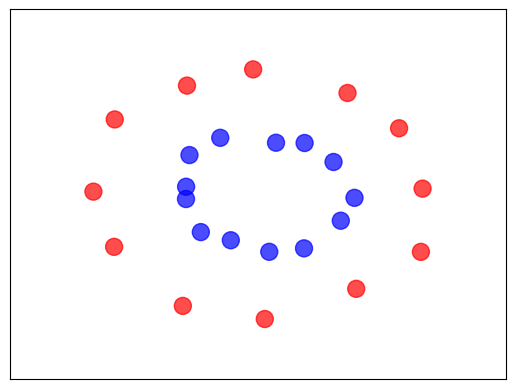

In [ ]:
N = 25
X_circle,y_circle = make_binary_clf(N,method = 'circles', noises=0.05, )
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X_circle,y_circle))

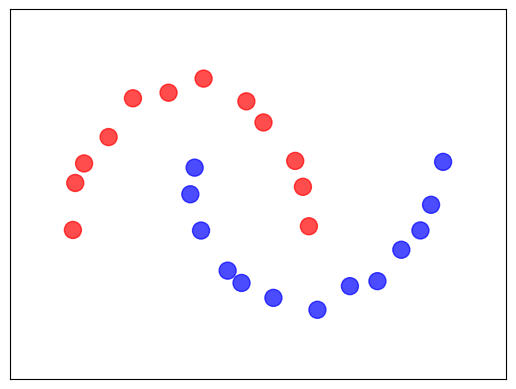

In [ ]:
N = 25
X_moons,y_moons = make_binary_clf(N,method = 'moons', noises=0.05, )
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X_moons,y_moons))